# Trabajo Práctico 1:  Selección de Características Estadísticas

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Datos

Primero, vamos a utilizar pandas para cargar los datos y almacernarlos en un dataframe local. El archivo de donde extraeremos los datos tiene de nombre `pima-indians-diabetes.csv`.

In [1]:
import pandas as pd

df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Por motivos de manipulacion, vamos a renombar las columnas del dataframe de acuerdo a la documentacion de los datos. Adicionalmente con el metodo `head()` podemos ver un resumen de los datos.

In [2]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

diabetes_df = df.rename(columns=dict(zip(df.columns, column_names)))

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Gráficas de densidad

En este paso, nos centraremos en la creación de gráficas de densidad para cada dimensión o columna de los datos. Es importante destacar que en nuestro conjunto de datos, cada fila está etiquetada con un valor de Class. Este valor es fundamental, ya que nos indica si un paciente está diagnosticado con diabetes (clase 1) o no (clase 0). Las gráficas de densidad nos permitirán visualizar la distribución de los valores de las características para ambas clases y comprender mejor cómo se diferencian.

### Separación de Datos

Primero, realizaremos la separación de nuestro DataFrame en dos conjuntos distintos:

* Clase 0: Este conjunto contendrá las filas de pacientes que no están diagnosticados con diabetes. Al observar la densidad de las características en este conjunto, podremos tener una idea de cómo se comportan las características en pacientes no diabéticos.

* Clase 1: Este conjunto incluirá las filas de pacientes diagnosticados con diabetes. Al analizar la densidad de las características en este conjunto, podremos identificar cómo difieren de las características de pacientes diabéticos.

La separación de los datos en estas dos clases nos permitirá visualizar y comparar las distribuciones de características específicas para cada grupo, lo que puede proporcionar información valiosa sobre las diferencias entre pacientes diagnosticados con diabetes y aquellos que no lo están. Esto es esencial en tareas de análisis y diagnóstico médico, ya que nos ayuda a comprender mejor los factores que contribuyen a la presencia o ausencia de la enfermedad.

In [3]:
class_0_data = diabetes_df[diabetes_df['Class'] == 0]
class_1_data = diabetes_df[diabetes_df['Class'] == 1]

class_0_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


Para graficar las funciones y transponer las curvas en cada figura, podemos realizar la siguiente operación. Esta técnica se utiliza para comparar diferentes curvas de densidad de variables en un solo gráfico.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity


def plot_density_functions(class_0_data, class_1_data):
  plt.figure(figsize=(15, 10))

  for i, column in enumerate(diabetes_df.columns[:-1]):
      plt.subplot(3, 3, i + 1)
      sns.kdeplot(class_0_data[column], label='Class 0', fill=True)
      sns.kdeplot(class_1_data[column], label='Class 1', fill=True)
      plt.title(f'Density Plot for {column}')
      plt.legend()

  plt.tight_layout()
  plt.show()
  

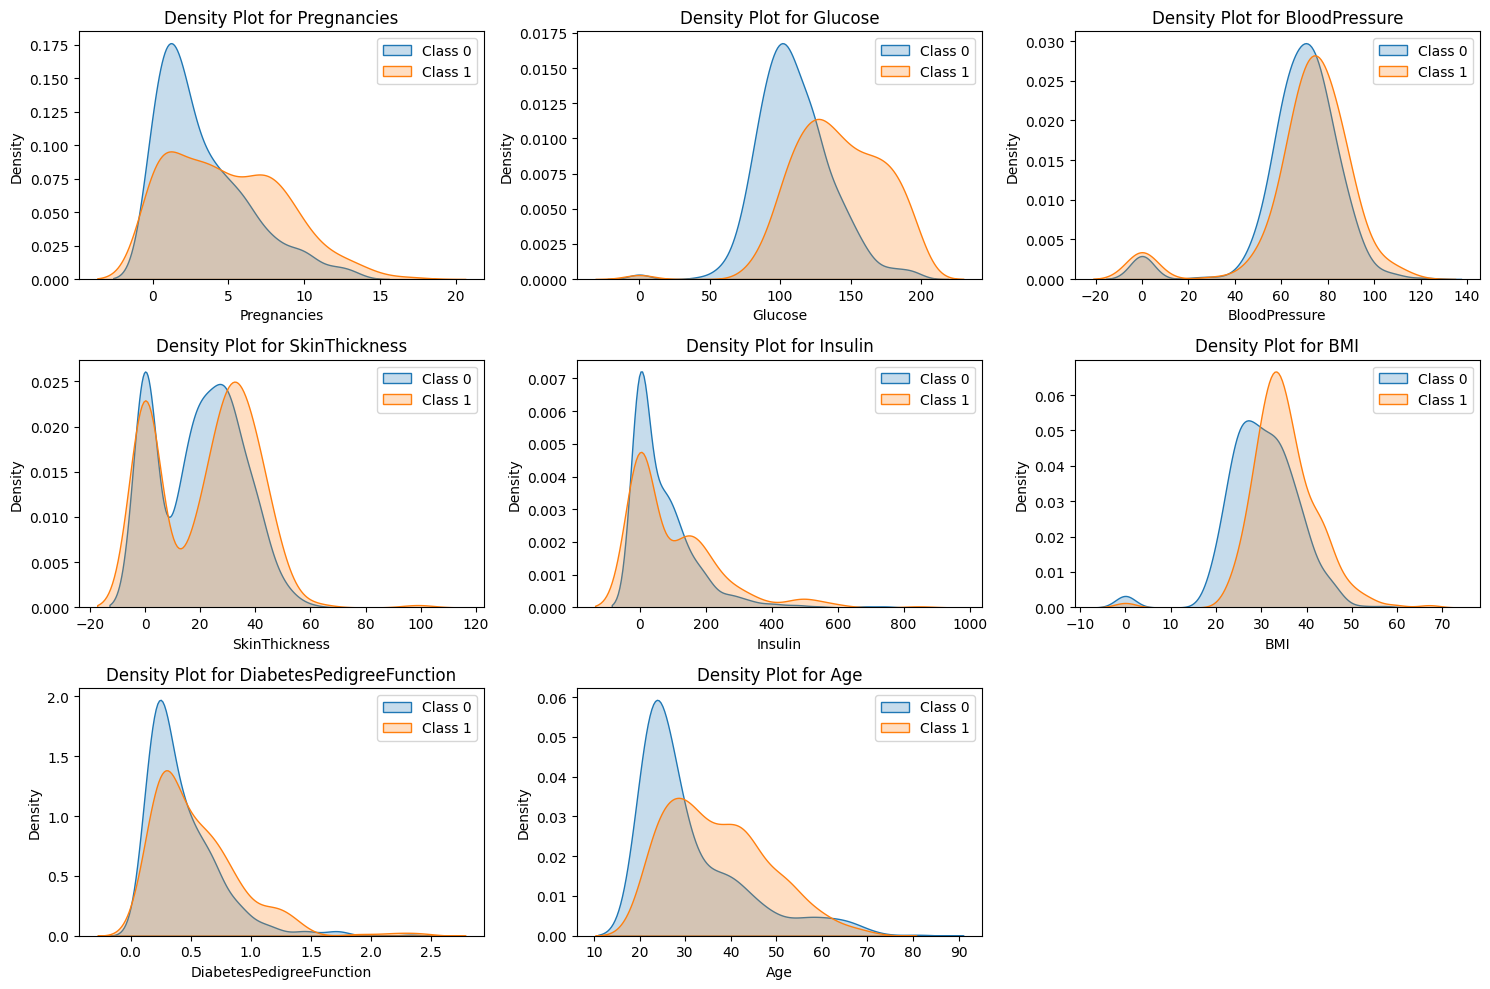

In [5]:
plot_density_functions(class_0_data, class_1_data)

### Analisis de resultados 

Al observar detenidamente las gráficas de densidad (density plots), se pueden extraer observaciones valiosas sobre las características (features) de los datos en relación con la variable de clase (diagnóstico de diabetes). Aquí presento un análisis más detallado:

* **Pocas variaciones en ciertas características**: Las características "BloodPressure," "SkinThickness," y "Insulin" muestran curvas de densidad que presentan una falta significativa de variación entre las dos clases (diabetes y no diabetes). Esta observación preliminar sugiere que estas características pueden tener un impacto limitado en la capacidad de predecir si un paciente tiene diabetes o no. En otras palabras, estas características parecen ser similares en ambos grupos y, por lo tanto, pueden no proporcionar información discriminativa relevante para la clasificación de pacientes.

* **Diferencias notables en otras características**: Por otro lado, las características "Pregnancies," "Glucosa," y "Age" exhiben curvas de densidad que muestran diferencias notables entre las dos clases. Esto indica que estas características varían sustancialmente según si un paciente tiene diabetes o no. Por ejemplo, las curvas de densidad de "Glucosa" y "Age" podrían indicar que estos factores desempeñan un papel más destacado en la determinación del riesgo de diabetes. Por lo tanto, estas características parecen ser informativas y podrían desempeñar un papel importante en la predicción de la diabetes.

Este análisis preliminar de las gráficas de densidad sugiere que no todas las características tienen el mismo impacto en la predicción de la diabetes. Algunas pueden no ser muy útiles para este propósito, mientras que otras parecen ser más prometedoras y merecen una atención adicional en futuros análisis y modelos de predicción.

## 3. Calculo de pares de densidad y divergencia KL

En esta etapa, nos enfocaremos en calcular los pares de densidad correspondientes para cada dimensión o característica en función de los valores de destino (target values) en nuestro conjunto de datos. Para lograr esto, emplearemos un enfoque basado en histogramas. El objetivo es obtener resultados estructurados y manejables que puedan representarse eficazmente como una matriz de tuplas.

Procedimiento:

* Selección de dimensiones y valores de destino: Comenzaremos seleccionando las dimensiones (características) que deseamos analizar en nuestro conjunto de datos. Estas dimensiones se considerarán las variables independientes en nuestros cálculos. Además, identificaremos los valores de destino, en este caso, las clases (por ejemplo, "diabetes" y "no diabetes"), que serán las variables dependientes.

* Cálculo de histogramas de densidad: Para cada par de dimensión y valor de destino, calcularemos un histograma de densidad. El histograma de densidad representa la distribución de valores de una característica en función de una clase específica. Esto nos proporcionará información detallada sobre cómo se distribuyen los valores de esa característica en cada clase.

* Almacenamiento en una lista de tuplas: Al completar los cálculos de los histogramas de densidad para todos los pares de dimensiones y valores de destino, almacenaremos los resultados en una lista de tuplas. Cada tupla contendrá información sobre la dimensión, el valor de destino correspondiente y el histograma de densidad asociado.

Este enfoque nos permitirá organizar los resultados de manera estructurada, lo que facilita el análisis y la comparación de las distribuciones de características para cada valor de destino. Además, proporciona una base sólida para realizar análisis estadísticos y posteriores visualizaciones que puedan ayudar a comprender mejor cómo las características afectan la variable objetivo, en este caso, la presencia o ausencia de diabetes.

In [6]:
def calculate_density_pairs(class_0_data, class_1_data):
    # Convert the dataframes to NumPy arrays
    class_0_array = class_0_data.values[:, :-1]  # Exclude the last column (target column)
    class_1_array = class_1_data.values[:, :-1]

    # Calculate density pairs without explicit for loops
    density_pairs = [(np.mean(np.histogram(class_0_array[:, i], bins=20, density=True)[0]),
                     np.mean(np.histogram(class_1_array[:, i], bins=20, density=True)[0])) for i in range(class_0_array.shape[1])]

    return density_pairs

In [7]:
density_pairs = calculate_density_pairs(class_0_data, class_1_data)
density_pairs

[(0.07692307692307693, 0.058823529411764705),
 (0.005076142131979695, 0.005025125628140704),
 (0.008196721311475412, 0.008771929824561405),
 (0.01666666666666667, 0.0101010101010101),
 (0.0013440860215053762, 0.001182033096926714),
 (0.017452006980802796, 0.014903129657228018),
 (0.444247001332741, 0.4288164665523156),
 (0.016666666666666666, 0.02040816326530612)]

Una vez que hayamos obtenido los pares de densidad, podremos calcular el índice de divergencia Kullback-Leibler (también conocido como la "divergencia de K-L") para cada conjunto de pares. Es importante recordar que cada par de densidad representa la distribución de una dimensión de los datos, donde el primero corresponde al conjunto de datos de pacientes que no tienen diabetes y el segundo al conjunto de datos de pacientes que sí tienen diabetes.

El índice de divergencia Kullback-Leibler es una medida que nos permite cuantificar la diferencia entre dos distribuciones de probabilidad. En este contexto, se aplicará para evaluar cuán diferentes son las distribuciones de las características entre los grupos de pacientes con y sin diabetes. Cuanto mayor sea la divergencia K-L entre las dos distribuciones, mayor será la diferencia entre ellas en términos de las características analizadas.

Este cálculo es esencial para comprender y cuantificar la contribución de cada característica en la diferenciación entre los grupos de pacientes con y sin diabetes. Los valores de la divergencia K-L pueden proporcionar información valiosa sobre qué características son más informativas en la identificación de la enfermedad y cuáles tienen un impacto menor. El análisis de estos índices permitirá identificar características significativas que puedan utilizarse en futuros modelos de predicción o diagnóstico de diabetes.

In [8]:
import math

def calculate_KL(density_pairs, column_names):
    divergences = []

    for (p, q), column_name in zip(density_pairs, column_names):
        p = max(p, 1e-10)
        q = max(q, 1e-10)

        divergence = p * math.log(p / q)
        divergences.append((column_name, divergence))

    return divergences



In [9]:
KL_scores = calculate_KL(density_pairs, diabetes_df.columns)
KL_scores

[('Pregnancies', 0.0206356912765138),
 ('Glucose', 5.127459891626243e-05),
 ('BloodPressure', -0.000555922920809516),
 ('SkinThickness', 0.008346254798541492),
 ('Insulin', 0.0001726859203939937),
 ('BMI', 0.0027553825524771793),
 ('DiabetesPedigreeFunction', 0.015704889632896825),
 ('Age', -0.003375404401857899)]

Al analizar los resultados, observamos que el índice que presenta el valor más alto es el de BMI. Esto indica que las distribuciones de las características, en particular la del índice de masa corporal (BMI), son las que varían significativamente entre las diferentes clases (diabetes y no diabetes).

Esta observación es valiosa porque señala que el índice de masa corporal puede desempeñar un papel importante en la diferenciación entre los grupos de pacientes con y sin diabetes. El hecho de que el índice de masa corporal presente una alta divergencia Kullback-Leibler sugiere que podría ser una característica distintiva que contribuye a la identificación de la enfermedad. En otras palabras, el BMI puede ser un indicador relevante para predecir o diagnosticar la diabetes, ya que sus distribuciones en las dos clases son distintas.

Estos resultados pueden orientar futuros análisis y modelos de predicción, destacando la importancia de considerar el BMI como una característica influyente en la evaluación y detección de la diabetes.

## 4. Selección de mejores features.

Basándonos en el cálculo de la función de Kullback-Leibler, vamos a implementar un algoritmo que tome un parámetro tau. Este parámetro nos indicará cuántas de las mejores características deseamos seleccionar. Además, el algoritmo devolverá el DataFrame restringido con las mejores características.

**Procedimiento**:

Ordenar por el valor de la función Kullback-Leibler: Primero, ordenaremos las características (columnas) del DataFrame según los valores de la función Kullback-Leibler en orden descendente. Esto nos permitirá identificar las características que tienen la mayor contribución en la diferenciación entre las clases.

* Seleccionar las mejores características: A continuación, seleccionaremos las mejores características según el valor de tau. Si tau es igual a 5, seleccionaremos las 5 mejores características; si es igual a 10, seleccionaremos las 10 mejores características, y así sucesivamente.

* Crear un nuevo DataFrame con las mejores características: A partir de la selección realizada en el paso anterior, crearemos un nuevo DataFrame que contendrá únicamente las características elegidas. Este DataFrame restringido será el resultado final y contendrá solo las características más relevantes según el valor de tau.

* Devolver el DataFrame restringido: Finalmente, devolveremos el DataFrame restringido que contiene las mejores características. Este DataFrame es el que se utilizará en análisis posteriores y en la construcción de modelos de predicción.

La capacidad de elegir un valor tau nos permite ajustar el número de características seleccionadas según nuestros requisitos y objetivos específicos. La selección de las mejores características es esencial para reducir la dimensionalidad de los datos y centrarse en aquellas que tienen un mayor impacto en la predicción o el diagnóstico de la diabetes.

In [10]:
def select_best_tau_features_from_kl_list(kl_scores, tau):
    sorted_KL_scores = sorted(kl_scores, key=lambda x: x[1], reverse=True)
    
    selected_dimensions = [item[0] for item in sorted_KL_scores[:tau]]

    return selected_dimensions


In [11]:
def select_best_features_kl(X, tau):
    
    X_class_0 = X[X['Class'] == 0]
    X_class_1 = X[X['Class'] == 1]

    X_density_pairs = calculate_density_pairs(X_class_0, X_class_1)    
    kl_scores = calculate_KL(X_density_pairs,  diabetes_df.columns)
    selected_dimensions = select_best_tau_features_from_kl_list(kl_scores, tau)

    X_transformed = X.loc[:, selected_dimensions]

    return X_transformed

In [12]:
tau = 5

X_transformed = select_best_features_kl(diabetes_df, tau)

diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X_transformed.head()

,Pregnancies,DiabetesPedigreeFunction,SkinThickness,BMI,Insulin
0,6,0.627,35,33.6,0
1,1,0.351,29,26.6,0
2,8,0.672,0,23.3,0
3,1,0.167,23,28.1,94
4,0,2.288,35,43.1,168


Como podemos ver, con un valor de tau de 5 las mejores dimensiones son las de **Pregnancies**, **DiabetesPedigreeFunction**, **SkinThickness**, **BMI** e **Insulina**.

La selección de estas cinco dimensiones como las más relevantes para el análisis o el modelado de la diabetes es fundamental. Proporciona una base sólida para futuros estudios y modelos predictivos, ya que se centra en las características que tienen un mayor impacto en la variable objetivo. Esto permite una mayor precisión en la predicción y el diagnóstico de la diabetes, lo que es crucial en el ámbito de la atención médica.

## 5. Experimento con Maquina de Soporte Vectorial.

En esta sección, vamos a llevar a cabo un experimento utilizando una Máquina de Soporte Vectorial (SVM) para la clasificación de datos. Para este experimento, utilizaremos diferentes valores de tau, específicamente, 2, 3, 4, 5 y 8. El valor de tau indica cuántas de las mejores dimensiones seleccionadas previamente se utilizarán en el modelo. Un valor de tau igual a 8 significa que no se eliminará ninguna dimensión, mientras que otros valores de tau indican cuántas dimensiones se retendrán.

Este experimento nos proporcionará información sobre cuál es el valor de tau más adecuado y cómo la selección de características influye en la capacidad de predicción del modelo SVM. El objetivo es encontrar el equilibrio adecuado entre la reducción de la dimensionalidad y la precisión de la predicción. Como métrica vamos a utilizar el accuracy result.

Antes de instanciar y entrenar el modelo SVM, dividiremos el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de pruebas. Usaremos una división típica de datos en la que el conjunto de pruebas contendrá el 30% de los datos y el conjunto de entrenamiento contendrá el 70% restante. Esto nos permitirá evaluar la capacidad del modelo para generalizar a datos no vistos.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[:, :-1], diabetes_df['Class'], test_size=0.3, random_state=42)


In [15]:
taus = [2, 3, 4, 5, 8]

results = {'Tau': [], 'Accuracy': []}

for tau in taus:
    X_transformed = select_best_features_kl(diabetes_df, tau)

    X_train_transformed, X_test_transformed, _, _ = train_test_split(X_transformed, diabetes_df['Class'], test_size=0.3, random_state=42)

    svm_transformed = SVC()
    svm_transformed.fit(X_train_transformed, y_train)
    accuracy_transformed = accuracy_score(y_test, svm_transformed.predict(X_test_transformed))

    results['Tau'].append(tau if tau is not None else 'None')
    results['Accuracy'].append(accuracy_transformed)


results_df = pd.DataFrame(results)
print("Results:")
print(results_df)

Results:
   Tau  Accuracy
0    2  0.653680
1    3  0.662338
2    4  0.666667
3    5  0.640693
4    8  0.735931


Al analizar los resultados de nuestro experimento con diferentes valores de `tau` en el modelo SVM, podemos observar ciertos patrones que proporcionan valiosa información:

1. **Mejor precisión con Tau igual a 8:** El valor de `tau` igual a 8, que indica que no se eliminan dimensiones, resulta en el mejor resultado de precisión (accuracy). Esto significa que el modelo SVM utiliza todas las dimensiones de características disponibles para hacer predicciones y logra una precisión más alta. Sin embargo, esta ventaja en precisión puede estar asociada con un mayor costo computacional y de procesamiento, especialmente si el conjunto de datos es grande y las dimensiones son numerosas.

2. **Tau igual a 4 como compromiso:** Por otro lado, al utilizar un valor de `tau` igual a 4, se logra un buen equilibrio entre la precisión del modelo y la reducción de la dimensionalidad. Esto indica que, al mantener solo cuatro de las dimensiones más relevantes, aún podemos obtener un rendimiento bastante alto del modelo. Esto puede ser beneficioso en situaciones donde el poder de cómputo y procesamiento es una consideración importante, ya que reducir la dimensionalidad puede acelerar significativamente el tiempo de entrenamiento y predicción.

La elección del valor de `tau` dependerá de las prioridades y restricciones específicas del problema. Si se busca la máxima precisión y se dispone de suficiente capacidad de cómputo, Tau igual a 8 puede ser la elección. Sin embargo, si la eficiencia computacional es una preocupación, Tau igual a 4 puede ofrecer un buen equilibrio entre precisión y complejidad computacional.

En resumen, al ajustar el valor de `tau`, podemos adaptar el modelo SVM a las necesidades específicas del problema, ya sea para optimizar la precisión o para lograr un mejor rendimiento computacional. La flexibilidad en la selección de características es una ventaja importante de este enfoque.